# Tutorial/Assignment 4

In [1]:
# Load the packages you will need
import numpy as np
import scipy as sp
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt

## Fitting to a distribution

In [2]:
np.random.seed(112)

# Create a normal distribution from scipy stats with mean 0 and standard deviation 1
distr = sp.stats.norm(0, 1)

# Sample the distribution 1000 times (rvs means random variates)
vals = distr.rvs(1000)

Use the NumPy histogram function to create an array of counts and bins.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

Note how the length of the bins array is one more than the number of elements in the counts array. This is because NumPy returns the bin edges.

For this part of the problem use 20 bins.

In [3]:
counts, bins = np.histogram(vals, bins=20)
bins

array([-3.34267418, -3.02042566, -2.69817714, -2.37592862, -2.0536801 ,
       -1.73143158, -1.40918305, -1.08693453, -0.76468601, -0.44243749,
       -0.12018897,  0.20205955,  0.52430807,  0.84655659,  1.16880512,
        1.49105364,  1.81330216,  2.13555068,  2.4577992 ,  2.78004772,
        3.10229624])

<BarContainer object of 20 artists>

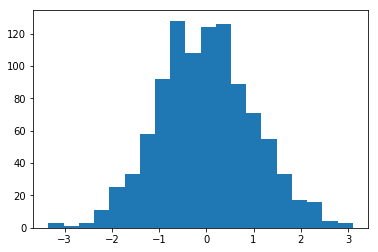

In [4]:
# In order to take the output from the NumPy histogram function and plot it as a histogram
# we need to use the bin edges, and the difference between bin edges as the width.

# If you used the variable name 'counts' and 'bins' in the previous step then the plot will run correctly.
plt.bar(bins[:-1], counts, align='edge', width=np.diff(bins))

Define the model function

$$y(x) = \frac{A}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

In [5]:
def model(x, A, mu, sigma):
    return A/((np.pi*2)**0.5*sigma)*np.exp(-(x - mu)**2/(2*sigma**2))

Plot the model on top of the data with some initial set of parameters.

For the uncertainties take the square root of the bin height. **Be careful about bins that don't have any data in them as the uncertainty is zero. To fix this, assign a finite uncertainty using the `np.where` function.**

https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

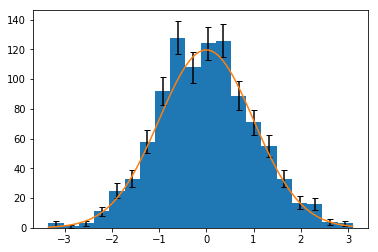

In [6]:
# If we just take counts**0.5 the uncertainty is 0 in any bin that has zero counts.
# This will cause a division by zero and the fit will fail.
# To fix this, assign an uncertainty of 1 whenever counts is 0.
y_err = np.where(counts == 0, 1, counts**0.5)

plt.bar(bins[:-1], counts, align='edge', width=np.diff(bins))

bin_centers = (bins[1:] + bins[:-1])/2  # The errorbar will be shown at the center of the bin
# Note the use of the space after 'k' in the format to indicate we don't want any line or marker
plt.errorbar(bin_centers, counts, yerr=y_err, fmt='k ', capsize=3)  

x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, model(x, 300, 0, 1), zorder=10, c='C1')

Fit to the data with your model.

In [7]:
pOpt, pCov = sp.optimize.curve_fit(model, bin_centers, counts, p0=(300, 0, 1.0), 
                                   sigma=y_err, absolute_sigma=True)

pOpt

array([3.16829379e+02, 8.66509439e-04, 9.98885345e-01])

Plot the fit on top of the data

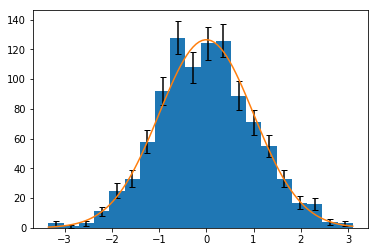

In [8]:
plt.bar(bins[:-1], counts, align='edge', width=np.diff(bins))

bin_centers = (bins[1:] + bins[:-1])/2  # The errorbar will be shown at the center of the bin
# Note the use of the space after 'k' in the format to indicate we don't want any line or marker
plt.errorbar(bin_centers, counts, yerr=y_err, fmt='k ', capsize=3)  

x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, model(x, *pOpt), zorder=10, c='C1')

Print the parameter estimates, their uncertainties, and check for correlations between the parameters.

[3.16829379e+02 8.66509439e-04 9.98885345e-01]
[[10.11150396  0.03229806  0.02332548]]
[[1.         0.00285047 0.01077915]
 [0.00285047 1.         0.10755509]
 [0.01077915 0.10755509 1.        ]]


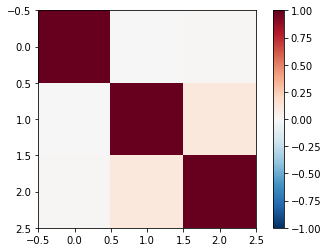

In [9]:
print(pOpt)

errs = np.sqrt(pCov.diagonal()).reshape((1, -1))
print(errs)

corr = pCov/(errs.T@errs)
print(corr)

plt.imshow(corr, vmin=-1, vmax=1, cmap='RdBu_r')
plt.colorbar()

## Bin widths

Re-do the above analysis, but now use a different number of bins. Does the number of bins affect your results? Try some extreme values.

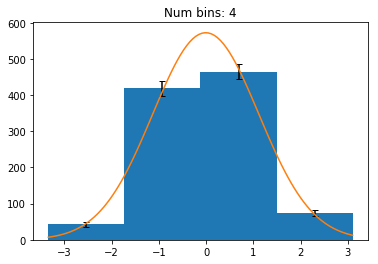

[ 1.61365764e+03 -8.17688150e-03  1.12448045e+00]
[[5.10505324e+01 3.60071735e-02 2.71869934e-02]]
[[1.         0.00294968 0.01600076]
 [0.00294968 1.         0.05846289]
 [0.01600076 0.05846289 1.        ]]


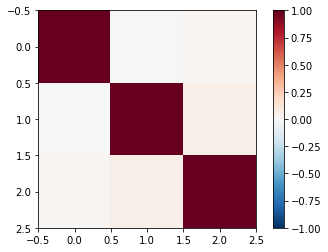

In [10]:
num_bins = 4
counts, bins = np.histogram(vals, bins=num_bins)
bin_centers = (bins[1:] + bins[:-1])/2
y_err = np.where(counts == 0, 1, counts**0.5)

# Fit the data
pOpt, pCov = sp.optimize.curve_fit(model, bin_centers, counts, p0=(100, 0, 1.0), 
                                   sigma=y_err, absolute_sigma=True)


# Create the plot of the fit
plt.bar(bins[:-1], counts, align='edge', width=np.diff(bins))
bin_centers = (bins[1:] + bins[:-1])/2  # The errorbar will be shown at the center of the bin
# Note the use of the space after 'k' in the format to indicate we don't want any line or marker
plt.errorbar(bin_centers, counts, yerr=y_err, fmt='k ', capsize=3)  

x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, model(x, *pOpt), zorder=10, c='C1')
plt.title(f'Num bins: {num_bins}')
plt.show()

# Interpret the results
print(pOpt)

errs = np.sqrt(pCov.diagonal()).reshape((1, -1))
print(errs)

corr = pCov/(errs.T@errs)
print(corr)

plt.imshow(corr, vmin=-1, vmax=1, cmap='RdBu_r')
plt.colorbar()
plt.show()

## Fitting to 2d data

Load the 'Nelson.csv' file (from https://www.itl.nist.gov/div898/strd/nls/data/LINKS/v-nelson.shtml) and fit it with this function:

$$\log(z(x, y)) = -a_1 - a_2x\exp(-a_3 y)$$

The expected values for the parameters are:

a_1 = 2.5906836021E+00 +/- 1.9149996413E-02

a_2 = 5.6177717026E-09 +/- 6.1124096540E-09

a_3 = -5.7701013174E-02 +/- 3.9572366543E-03

Load the data into x, y, z components

In [11]:
x_data, y_data, z_data = np.genfromtxt('Nelson.csv', delimiter=',', unpack=True)

Define the model. Note that the model function still expects a single parameter to be used for the independent variables, so you must pass it an array.

In [12]:
def model(v, a1, a2, a3):
    return a1 - a2*v[0]*np.exp(-a3*v[1])

Fit the data. Use as your starting parameters (a1, a2, a3) = (2.5, 5e-9, 1e-2).

You will need to pass both the x and y data simultaneously. See the `xdata` part of the documentation for more details: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [13]:
pOpt, pCov = sp.optimize.curve_fit(model, [x_data, y_data], np.log(z_data), p0=(2.5, 5e-9, 1e-2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Check that you get the correct parameter estimates:

a_1 = 2.5906836021E+00 +/- 1.9149996413E-02

a_2 = 5.6177717026E-09 +/- 6.1124096540E-09

a_3 = -5.7701013174E-02 +/- 3.9572366543E-03

In [14]:
print(pOpt)

[ 2.59068360e+00  5.61777298e-09 -5.77010123e-02]


Show the correlation matrix. Are there strong correlations between some of the parameters?

[[1.91500016e-02 6.11259388e-09 3.95721810e-03]]
[[1.         0.4508595  0.44203902]
 [0.4508595  1.         0.99974645]
 [0.44203902 0.99974645 1.        ]]


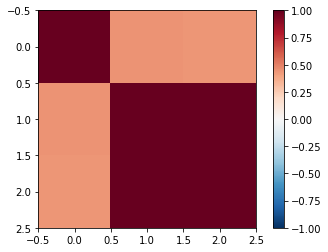

In [15]:
errs = np.sqrt(pCov.diagonal()).reshape((1, -1))
print(errs)

corr = pCov/(errs.T@errs)
print(corr)

plt.imshow(corr, vmin=-1, vmax=1, cmap='RdBu_r')
plt.colorbar()
plt.show()